In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import keras

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [5]:
#Creating the Convolutional Neural Network
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(64,64,3)))

In [6]:
model.add(MaxPooling2D(pool_size=2))

In [7]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',))
model.add(MaxPooling2D(pool_size=2))

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))

In [10]:
#Adding the flattened layer
model.add(Flatten())

In [11]:
#Model summery
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [12]:
#Creating the ANN
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [13]:
model.add(Dense(units=4,activation='softmax',kernel_initializer='uniform'))

In [14]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [16]:
#Image processing
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255, 
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
#Set the Directory
train_set = train_datagen.flow_from_directory (
    '/content/drive/MyDrive/DATA SCIENCE FILES/Brain Tumour Project/Training',
    target_size=(64, 64), #Each and every image will be reshaped to 64x64 prior to being fed to the CNN
    batch_size=32,
    class_mode='categorical')

Found 2870 images belonging to 4 classes.


In [19]:
test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/DATA SCIENCE FILES/Brain Tumour Project/Testing',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 394 images belonging to 4 classes.


In [20]:
len(train_set)

90

In [23]:
#Fitting the model
model.fit(train_set, #Exclusively we do not need to specify 'y' here
        steps_per_epoch= len(train_set), #No of batches the CNN goes through before we call it a logical epoch
        epochs=10,
        validation_data=test_set,
        validation_steps=len(test_set))

Epoch 1/10
90/90 [==============================] - 17s 189ms/step - loss: 0.5322 - accuracy: 0.7840 - val_loss: 1.6493 - val_accuracy: 0.5787
Epoch 2/10
90/90 [==============================] - 17s 186ms/step - loss: 0.4702 - accuracy: 0.8132 - val_loss: 2.0176 - val_accuracy: 0.5584
Epoch 3/10
90/90 [==============================] - 17s 185ms/step - loss: 0.4544 - accuracy: 0.8164 - val_loss: 2.5685 - val_accuracy: 0.5102
Epoch 4/10
90/90 [==============================] - 17s 185ms/step - loss: 0.4579 - accuracy: 0.8111 - val_loss: 1.5526 - val_accuracy: 0.6193
Epoch 5/10
90/90 [==============================] - 17s 186ms/step - loss: 0.4045 - accuracy: 0.8341 - val_loss: 1.9462 - val_accuracy: 0.5787
Epoch 6/10
90/90 [==============================] - 17s 185ms/step - loss: 0.4012 - accuracy: 0.8387 - val_loss: 1.8243 - val_accuracy: 0.5787
Epoch 7/10
90/90 [==============================] - 17s 188ms/step - loss: 0.3783 - accuracy: 0.8467 - val_loss: 1.5191 - val_accuracy: 0.6421

In [24]:
#Predicting a New Image

In [25]:
import numpy as np
from keras.preprocessing import image

In [35]:
#importing meningioma kind of image
new_image=image.load_img('/content/drive/MyDrive/DATA SCIENCE FILES/Brain Tumour Project/MENINGIOMA02.jpg',target_size=(64,64))

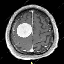

In [36]:
new_image

In [37]:
new_image=image.img_to_array(new_image)

In [38]:
new_image.shape

(64, 64, 3)

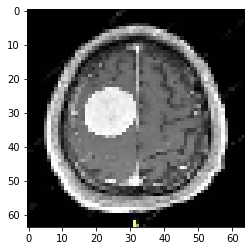

In [39]:
import matplotlib.pyplot as plt
plt.imshow(new_image.astype(int))

In [40]:
new_image=np.expand_dims(new_image,axis=0)
new_image.shape

(1, 64, 64, 3)

In [41]:
result=model.predict(new_image)

In [42]:
result

array([[0., 1., 0., 0.]], dtype=float32)

In [43]:
train_set.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0